In [68]:
import time
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
# from sklearn_extra.cluster import KMedoids

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
#from konlpy.tag import Komoran

#import pandas_datareader as pdr
from datetime import datetime

from scipy.cluster.hierarchy import linkage 
from scipy.cluster.hierarchy import dendrogram 

from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw

import scipy.spatial.distance as ssd

#from gensim.models import Word2Vec as w_to_v

In [69]:
df = pd.read_csv('../data/df.csv', encoding = 'euc-kr')
df_price = pd.read_pickle('../fkl/price_normal.fkl')
df_dtw_matrix = pd.read_pickle('../fkl/dtw_matrix.fkl')

df_finance = pd.read_pickle('../fkl/financial_i_log_categoric.fkl')
df_price = df_price.dropna(axis = 0)

# 기업개요

In [70]:
#TFidf 변환 및 KMeans 학습

countvectorizer = CountVectorizer(stop_words=['1월', '1일','2월','3월','4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월', 'M', 'co', 'company', 'global', 'inc', '가능', '가능', '가치', '각종', 
                                              '감소', '강화', '개', '개선', '개시', '개요', '거점', '결과', '결정', '경영', 
                                              '경우', '경쟁력', '계속', '계획', '공시', '과정', '관련', '관리', '구분', 
                                              '구성', '구조', '구축', '국가', '국내', '국내외', '규모', '극대', '글로벌', 
                                              '기간', '기능', '기대', '기록', '기반', '기업', '기존', '기준', '기초',
                                              '기타', '기회', '내용', '노력', '누적', '능력', '다각', '다수', '다양', '다음',
                                              '단계', '단위', '단일', '달성', '담당', '당기', '당사', '대비', '대상', '대응',
                                              '도약', '도입', '동기', '동력', '동사', '동시', '드', '등', '마련', '매출', 
                                              '매출액', '목적', '목표', '및', '바탕', '반기', '반영', '방식', '법인', '변경',
                                              '변동', '변화', '별도', '보수', '보호', '부가', '부문', '부분', '분기', '분류',
                                              '분야', '비용', '비중', '사업', '사업장', '사용', '사항', '상기', '상반기', 
                                              '상승', '상장', '상호', '상황', '선도', '설계', '설립', '설비', '성격', '성장',
                                              '세계', '소유', '수요', '수익', '수준', '수출', '수행', '시작', '시장', '시행',
                                              '실적', '아래', '안정', '업무', '업체', '역량', '역할', '연간', '연결', '영역', 
                                              '영업', '영위', '영향', '예상', '예정', '완료', '요구', '요약', '요인', '우수', 
                                              '우위', '운영', '위주', '위치', '유가증권', '유지', '의', '이상', '이익', '이하', 
                                              '이후', '일반', '일부', '임대', '입지', '자금', '자본', '자산', '자체', '작성', 
                                              '장기', '장벽', '장점', '재무', '적극', '적용', '전개', '전년', '전년 동기', 
                                              '전략', '전망', '전문', '전반', '전체', '점유', '제고', '제외', '제품', '조정', '조직', 
                                              '종속', '종합', '주', '주도', '주력', '주식', '주식회사', '주요', '준비', '중심',
                                              '중요', '증가', '증대', '지배', '지분', '지속', '지역', '지원', '지위', '지주',
                                              '지주회사', '진행', '집중', '차별', '차지', '참고', '참여', '참조', '창출',
                                              '채널', '처리', '체계', '체제', '최고', '최근', '최대', '최소', '최초',
                                              '추가', '추세', '추진', '충족', '투자', '특성', '특수', '특징', '평가',
                                              '포함', '필요', '항목', '해당', '해외', '핵심', '향상', '향후', '현재', '현지',
                                              '현황', '형태', '확대', '확보', '확장', '활동', '활용', '회사', '효율'], 
                                  ngram_range=(1,2), max_df = 0.4, min_df = 0.05, lowercase=True, max_features = 550) #0.4 0.05
tfidftransformer = TfidfTransformer()

data = df["morph_sumdart"].copy()
data_trans = tfidftransformer.fit_transform(countvectorizer.fit_transform(data))

In [71]:
# 실제 학습
clst = KMeans(n_clusters=10, random_state=0)
clst.fit(data_trans)


clusters_text = clst.labels_.tolist()

centers_text = clst.cluster_centers_ # cluster의 중심

In [72]:
df["cluster"]= clusters_text

df_groupby_cluster = df.groupby('cluster')
#result = dict(list((df_groupby_cluster['name'])))

groupby_list = df.groupby('cluster')['labels_kse'].apply(list)

for i in groupby_list:
    print(i)
    print('\n')

['서비스업', '서비스업', '서비스업', '서비스업', '서비스업', '서비스업', '통신업', '통신업', '서비스업', '서비스업', '서비스업', '화학']


['은행', '금융업', '금융업', '금융업', '금융업', '은행', '증권', '금융업', '증권', '금융업', '증권', '증권', '금융업', '증권']


['전기,전자', '운수장비', '운수장비', '운수장비', '전기,전자', '기계', '전기,전자', '운수장비', '운수장비', '운수장비', '전기,전자', '운수장비', '서비스업', '전기,전자', '운수장비', '금융업', '화학']


['유통업', '통신업', '화학', '서비스업', '제조업', '화학', '서비스업', '서비스업', '음식료품', '음식료품', '유통업', '화학', '유통업', '유통업', '서비스업', '전기,전자', '유통업', '유통업', '금융업', '유통업', '음식료품', '유통업', '유통업', '금융업', '유통업', '기계', '음식료품', '음식료품', '화학', '섬유,의복', '화학', '음식료품', '서비스업', '유통업', '유통업', '서비스업', '제조업', '섬유,의복', '금융업', '서비스업', '서비스업', '섬유,의복', '유통업', nan, '음식료품', '금융업', '음식료품', '유통업', '음식료품']


['전기,전자', '화학', '전기,전자', '화학', '금융업', '금융업', '전기,전자', '전기,전자', '화학', '비금속광물', '철강및금속', '화학', '화학', '화학', '전기,전자', '철강및금속', '화학', '화학', '금융업', '화학', '전기,전자', '화학', '유통업', '화학', '화학', '운수장비', '금융업', '화학', '전기,전자', '화학', '전기,전자', '금융업', '화학', '금융업', '화학', '철강및금속', '철강및금속', '기계', '금융업', '화학']


['의약품', '의약품', '의

In [73]:
# 데이터 프레임 형태로 클러스터 결과 확인

df["cluster"]= clusters_text

df_groupby_cluster = df.groupby('cluster')
#result = dict(list((df_groupby_cluster['name'])))

groupby_list = df.groupby('cluster')['name'].apply(list)

for i in groupby_list:
    print(i)
    print('\n')

['NAVER', '카카오', '크래프톤', '엔씨소프트', '하이브', '넷마블', 'KT', 'LG유플러스', '제일기획', '더블유게임즈', '이노션', '태광산업']


['카카오뱅크', 'KB금융', '신한지주', '하나금융지주', '우리금융지주', '기업은행', '미래에셋증권', '한국금융지주', '삼성증권', '삼성카드', 'NH투자증권', '메리츠증권', 'BNK금융지주', '키움증권']


['삼성전자', '현대차', '기아', '현대모비스', 'LG전자', '한온시스템', 'LG이노텍', '한국항공우주', '만도', '현대로템', 'DB하이텍', '현대위아', '두산', '세방전지', 'SNT모티브', 'LX홀딩스', 'LX하우시스']


['삼성물산', 'SK텔레콤', 'LG생활건강', '삼성에스디에스', 'KT&G;', '아모레퍼시픽', '강원랜드', '코웨이', 'CJ제일제당', '오리온', '이마트', '아모레G', '호텔신라', 'GS리테일', '에스원', '한화시스템', '동서', 'BGF리테일', 'CJ', '한샘', '하이트진로', '신세계', '휠라홀딩스', 'LS', '영원무역', '현대엘리베이', '오뚜기', '농심', '동원시스템즈', 'F&F;홀딩스', '코스맥스', '롯데칠성', '롯데관광개발', 'SK네트웍스', '신세계인터내셔날', 'CJ CGV', '지누스', '한섬', '오리온홀딩스', 'GKL', '쿠쿠홈시스', '한세실업', '현대그린푸드', '동원산업', '대상', '쿠쿠홀딩스', '동원F&B;', '롯데하이마트', '삼양식품']


['SK하이닉스', 'LG화학', '삼성SDI', 'SK이노베이션', 'SK', 'LG', 'SK아이이테크놀로지', '삼성전기', 'S-Oil', '포스코케미칼', '고려아연', '한화솔루션', '롯데케미칼', 'SKC', 'LG디스플레이', '현대제철', '금호석유', '한국타이어앤테크놀로지', 'GS', '한솔케미칼', '두산퓨얼셀', 'OCI', '포스코인터내셔널', '

# 주가변동 : 클러스터 20개

In [74]:
# 실제 클러스터링
n_clusters = 20
tsclst = TimeSeriesKMeans(n_clusters = n_clusters, metric = 'euclidean') #'euclidean', 'dtw'
tsclst.fit(df_price)

clusters_price = tsclst.labels_.tolist()

centers_price = tsclst.cluster_centers_

In [75]:
centers_price = centers_price.reshape(n_clusters,248)
centers_price

array([[-1.56733085, -1.54474436, -1.66418885, ...,  1.32849497,
         1.27137956,  1.23942042],
       [-0.56604831, -0.57235276, -0.83217443, ..., -1.65797595,
        -1.59868209, -1.71930229],
       [-1.58496096, -1.63054115, -1.76316258, ..., -0.57194876,
        -0.60009459, -0.6120941 ],
       ...,
       [-1.65355416, -1.70924759, -1.83258249, ...,  0.8519573 ,
         0.88573097,  0.87476402],
       [ 1.62447165,  1.52049205,  1.31253284, ...,  0.58467563,
         0.79263483,  1.00059404],
       [-1.50542498, -1.4737835 , -1.57589476, ...,  0.74329127,
         0.799674  ,  0.76992618]])

In [76]:
# 데이터 프레임 형태로 클러스터 결과 확인

df_price["cluster"]= clusters_price
df_price["name"]= df_price.index

df_groupby_cluster = df_price.groupby('cluster')
#result = dict(list((df_groupby_cluster['name'])))

groupby_list = df_price.groupby('cluster')["name"].apply(list)

for i in groupby_list:
    print(i)
    print('\n')
df_price = df_price.drop("name",axis=1, errors = 'ignore')
df_price = df_price.drop("cluster",axis=1, errors = 'ignore')

['삼성바이오로직스', '고려아연', '삼성증권', '삼성카드', '메리츠증권', '효성첨단소재', 'KCC', '한샘', '코오롱인더', '효성', '롯데정밀화학']


['LG생활건강', '엔씨소프트', '삼성에스디에스', '한화솔루션', '현대글로비스', '미래에셋증권', 'CJ대한통운', '한미약품', '키움증권', '오뚜기']


['LG', '삼성생명', '아모레퍼시픽', '한국조선해양', 'LG디스플레이', '금호석유', '아모레G', '하이트진로', '신세계', '현대백화점', '한국앤컴퍼니', '아이에스동서', '신세계인터내셔날', '한국콜마', 'GKL', '보령제약', '동원산업', '쿠쿠홀딩스']


['셀트리온', '유한양행', '녹십자', '녹십자홀딩스', '종근당', '부광약품']


['POSCO', '현대제철', '팬오션', '한화생명', '대우건설', '현대미포조선', '영원무역', '롯데칠성', 'LX인터내셔널', '한섬', '풍산', '현대그린푸드', '삼양홀딩스', '넥센타이어']


['삼성물산', '한국전력', '한미사이언스', '씨에스윈드', 'LS', '대웅', '대웅제약']


['넷마블', '롯데지주', '대우조선해양', '휠라홀딩스', '이노션', '지누스', '현대홈쇼핑', '대상', '현대두산인프라코어']


['KT&G;', 'SK바이오팜', '한진칼', '신풍제약', 'SK케미칼', 'DL', '한올바이오파마', 'SK디스커버리', '영진약품', '삼양식품', '일양약품']


['롯데케미칼', '오리온', '동서', 'F&F;홀딩스', '대한유화']


['삼성SDI', '기아', 'SK이노베이션', 'LG전자', '포스코케미칼', 'CJ제일제당', '한국타이어앤테크놀로지', 'LG이노텍', 'GS건설', '한화시스템', '한국항공우주', 'CJ', 'DB하이텍', '현대위아', 'HDC현대산업개발', 'SK네트웍스', '세방전지']


['SK하이닉스', '한온시스템', '삼성중공업', 'GS리테일'

In [77]:
# 실제 클러스터링
finance_data = df_finance[["PER", "PBR", "PCR", "EV/EBITDA", "Dividend"]]
clst = KMeans(n_clusters=5)
clst.fit(finance_data)

clusters_finance = clst.labels_.tolist()

centers_finance = clst.cluster_centers_

In [78]:
############## 3번 대안 실행

In [79]:
df_text_result = df.copy()[['name']]
df_text_result['text_clusters'] = clusters_text

df_text_result

,name,text_clusters
0,삼성전자,2
1,SK하이닉스,4
2,NAVER,0
3,삼성바이오로직스,5
4,LG화학,4
...,...,...
195,LX홀딩스,2
196,롯데하이마트,3
197,LX하우시스,2
198,삼양식품,3


In [80]:
df_price_result = pd.DataFrame()
df_price_result['name'] = df_price.index
df_price_result['price_clusters'] = clusters_price
df_price_result

,name,price_clusters
0,삼성전자,13
1,SK하이닉스,10
2,NAVER,17
3,삼성바이오로직스,0
4,LG화학,13
...,...,...
189,현대두산인프라코어,6
190,롯데하이마트,10
191,LX하우시스,14
192,삼양식품,7


In [81]:
df_finance_result = pd.DataFrame()
df_finance_result['name'] = df_finance['name']
df_finance_result['finance_clusters'] = clusters_finance
df_finance_result

,name,finance_clusters
0,삼성전자,4
1,SK하이닉스,4
2,NAVER,1
3,삼성바이오로직스,1
4,LG화학,4
...,...,...
193,현대두산인프라코어,0
194,롯데하이마트,0
195,LX하우시스,0
196,삼양식품,4


In [82]:
from scipy.spatial import distance_matrix

In [83]:
distance_matrix_text = pd.DataFrame(distance_matrix(centers_text, centers_text))
distance_matrix_text

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.752195,0.682482,0.548261,0.604030,0.746781,0.688667,0.685565,0.697872,0.976480
1,0.752195,0.000000,0.791784,0.678765,0.703387,0.824349,0.783829,0.739479,0.785331,0.887511
2,0.682482,0.791784,0.000000,0.545839,0.468249,0.727149,0.619602,0.632937,0.611694,0.955737
3,0.548261,0.678765,0.545839,0.000000,0.413428,0.605908,0.542410,0.530391,0.531621,0.881188
4,0.604030,0.703387,0.468249,0.413428,0.000000,0.615355,0.494463,0.496017,0.539070,0.900666
5,0.746781,0.824349,0.727149,0.605908,0.615355,0.000000,0.719743,0.721180,0.728968,1.004182
6,0.688667,0.783829,0.619602,0.542410,0.494463,0.719743,0.000000,0.619933,0.601684,0.959849
7,0.685565,0.739479,0.632937,0.530391,0.496017,0.721180,0.619933,0.000000,0.647576,0.938250
8,0.697872,0.785331,0.611694,0.531621,0.539070,0.728968,0.601684,0.647576,0.000000,0.959837
9,0.976480,0.887511,0.955737,0.881188,0.900666,1.004182,0.959849,0.938250,0.959837,0.000000


In [84]:
distance_matrix_price = pd.DataFrame(distance_matrix(centers_price, centers_price))
distance_matrix_price

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,22.660189,15.819580,23.735495,9.654683,16.018619,17.676066,25.239575,22.543302,12.223112,19.663009,11.295866,6.543600,17.832656,10.871892,7.487430,12.071791,7.548602,22.089912,7.774632
1,22.660189,0.000000,14.015132,9.559790,19.842067,13.676490,12.678068,15.086952,10.329660,16.596471,9.614978,21.475193,24.658028,10.915376,19.107517,22.609572,22.866836,20.993515,19.840183,21.599102
2,15.819580,14.015132,0.000000,19.308677,8.292954,13.629461,10.448467,23.727751,14.851909,9.012603,8.195550,17.565944,17.515889,11.490031,8.600194,15.033917,21.822353,12.541265,24.354864,11.787417
3,23.735495,9.559790,19.308677,0.000000,23.432109,14.199559,17.949122,12.424069,12.768219,20.462407,15.123884,23.704899,26.166671,14.451540,23.104463,24.054393,20.469902,23.731655,16.138883,24.767616
4,9.654683,19.842067,8.292954,23.432109,0.000000,14.571882,13.504466,26.742892,20.146989,7.766023,14.713077,13.809171,11.406691,14.826394,5.478113,9.930091,18.636730,6.827613,24.887007,5.185868
5,16.018619,13.676490,13.629461,14.199559,14.571882,0.000000,11.783267,20.576700,18.000659,11.737449,13.736206,15.498591,18.687500,10.749949,15.666187,17.445855,17.433813,15.092760,18.645938,15.559043
6,17.676066,12.678068,10.448467,17.949122,13.504466,11.783267,0.000000,19.630306,18.625529,13.502168,12.804031,13.257248,17.791772,14.507245,11.584454,19.066378,22.763426,16.144601,22.889789,13.412642
7,25.239575,15.086952,23.727751,12.424069,26.742892,20.576700,19.630306,0.000000,17.948797,25.820982,21.291128,22.728561,25.367347,21.876248,24.656829,26.432155,22.172594,26.955644,17.259380,26.256223
8,22.543302,10.329660,14.851909,12.768219,20.146989,18.000659,18.625529,17.948797,0.000000,17.654286,10.656998,24.858908,25.118928,12.577451,20.343484,20.931787,21.725352,21.025313,20.534104,22.791297
9,12.223112,16.596471,9.012603,20.462407,7.766023,11.737449,13.502168,25.820982,17.654286,0.000000,12.219454,15.031945,15.607492,8.819906,10.952108,10.890162,17.340722,6.770272,22.618189,10.442247


In [85]:
distance_matrix_finance = pd.DataFrame(distance_matrix(centers_finance, centers_finance))
distance_matrix_finance

,0,1,2,3,4
0,0.000000,6.759787,5.075913,9.051825,2.685530
1,6.759787,0.000000,10.331649,14.180265,4.611926
2,5.075913,10.331649,0.000000,9.551765,6.765864
3,9.051825,14.180265,9.551765,0.000000,10.473909
4,2.685530,4.611926,6.765864,10.473909,0.000000


# MIN-Max 정규화 실행시 수행

In [86]:
# ## 대칭행렬 min_max 정규화하는 함수
# def normalize(distance_matrix):
#     # 행렬 반쪽만 num_list에 추가
#     num_list = []
#     for i in range(len(distance_matrix)):
#         for j in range(i+1, len(distance_matrix)):
#             num_list.append(distance_matrix[i][j])
            
#     num_array = np.array(num_list)
#     max_num = num_array.max() # 평균
#     min_num = num_array.min() # 표준편차
    
    
#     for i in range(len(distance_matrix)):
#         for j in range(len(distance_matrix)):
#             if distance_matrix[i][j] != 0:
#                 distance_matrix[i][j] = (distance_matrix[i][j]-min_num)/(max_num - min_num)
    
#     return distance_matrix

In [87]:
# distance_matrix_text = normalize(distance_matrix_text)
# distance_matrix_price = normalize(distance_matrix_price)
# distance_matrix_finance = normalize(distance_matrix_finance)

---

In [88]:
# distance_matrix_text

In [89]:
# distance_matrix_price

In [90]:
# distance_matrix_finance

In [91]:
# df_text_result --> 기업개요 클러스터링 결과 200 x 200
# df_price_result --> 주가변동 클러스터링 결과 194 x 194
# df_finance_result --> 재무지표 클러스터링 결과 198 x 198

df_merge_result = pd.merge(df_text_result, df_price_result, left_on='name', right_on='name', how='left')
df_merge_result = pd.merge(df_merge_result, df_finance_result, left_on='name', right_on='name', how='left')
df_merge_result = df_merge_result.fillna(100)
df_merge_result = df_merge_result.astype({'price_clusters':int, 'finance_clusters':int})
df_merge_result

,name,text_clusters,price_clusters,finance_clusters
0,삼성전자,2,13,4
1,SK하이닉스,4,10,4
2,NAVER,0,17,1
3,삼성바이오로직스,5,0,1
4,LG화학,4,13,4
...,...,...,...,...
195,LX홀딩스,2,100,100
196,롯데하이마트,3,10,0
197,LX하우시스,2,14,0
198,삼양식품,3,7,4


In [92]:
df_merge_result[df_merge_result['price_clusters'] == 100]

,name,text_clusters,price_clusters,finance_clusters
10,카카오뱅크,1,100,1
14,크래프톤,0,100,1
22,SK바이오사이언스,5,100,1
29,SK아이이테크놀로지,4,100,1
115,DL이앤씨,6,100,100
195,LX홀딩스,2,100,100


In [93]:
df_dist_text = pd.DataFrame(index = df_merge_result.index, columns = df_merge_result.index)

# df_clusters_result --> 클러스터링 결과 left join으로 합친 것 200 x 200, null 값은 100으로 채움
# normal_dist_text --> text 클러스터링 distance matrix
# normal_dist_price --> 주가 클러스터링 distance matrix

# 거리의 합으로 새로운 200x200 distance matrix 만들어보자

## 가중치

for i in range(len(df_merge_result)):
    for j in range(len(df_merge_result)):
        distance = 0

        text_cluster_1 = df_merge_result['text_clusters'][i] # 첫 번째 기업의 개요 클러스터
        text_cluster_2 = df_merge_result['text_clusters'][j] # 두 번째 기업의 개요 클러스터
        distance = distance_matrix_text[text_cluster_1][text_cluster_2] # 개요 클러스터 거리 * weight

        
        df_dist_text[i][j] = distance
        

df_dist_text

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_3588\312510403.py:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_dist_text[i][j] = distance


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.468249,0.682482,0.727149,0.468249,0.682482,0.468249,0.0,0.0,0.727149,...,0.545839,0.545839,0.0,0.468249,0.632937,0.0,0.545839,0.0,0.545839,0.727149
1,0.468249,0.0,0.60403,0.615355,0.0,0.60403,0.0,0.468249,0.468249,0.615355,...,0.413428,0.413428,0.468249,0.0,0.496017,0.468249,0.413428,0.468249,0.413428,0.615355
2,0.682482,0.60403,0.0,0.746781,0.60403,0.0,0.60403,0.682482,0.682482,0.746781,...,0.548261,0.548261,0.682482,0.60403,0.685565,0.682482,0.548261,0.682482,0.548261,0.746781
3,0.727149,0.615355,0.746781,0.0,0.615355,0.746781,0.615355,0.727149,0.727149,0.0,...,0.605908,0.605908,0.727149,0.615355,0.72118,0.727149,0.605908,0.727149,0.605908,0.0
4,0.468249,0.0,0.60403,0.615355,0.0,0.60403,0.0,0.468249,0.468249,0.615355,...,0.413428,0.413428,0.468249,0.0,0.496017,0.468249,0.413428,0.468249,0.413428,0.615355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.468249,0.682482,0.727149,0.468249,0.682482,0.468249,0.0,0.0,0.727149,...,0.545839,0.545839,0.0,0.468249,0.632937,0.0,0.545839,0.0,0.545839,0.727149
196,0.545839,0.413428,0.548261,0.605908,0.413428,0.548261,0.413428,0.545839,0.545839,0.605908,...,0.0,0.0,0.545839,0.413428,0.530391,0.545839,0.0,0.545839,0.0,0.605908
197,0.0,0.468249,0.682482,0.727149,0.468249,0.682482,0.468249,0.0,0.0,0.727149,...,0.545839,0.545839,0.0,0.468249,0.632937,0.0,0.545839,0.0,0.545839,0.727149
198,0.545839,0.413428,0.548261,0.605908,0.413428,0.548261,0.413428,0.545839,0.545839,0.605908,...,0.0,0.0,0.545839,0.413428,0.530391,0.545839,0.0,0.545839,0.0,0.605908


In [94]:
df_dist_price = pd.DataFrame(index = df_merge_result.index, columns = df_merge_result.index)

# df_clusters_result --> 클러스터링 결과 left join으로 합친 것 200 x 200, null 값은 100으로 채움
# normal_dist_text --> text 클러스터링 distance matrix
# normal_dist_price --> 주가 클러스터링 distance matrix

# 거리의 합으로 새로운 200x200 distance matrix 만들어보자

## 가중치

for i in range(len(df_merge_result)):
    for j in range(len(df_merge_result)):
        distance = 0
        try:
            price_cluster_1 = df_merge_result['price_clusters'][i] # 첫 번째 기업의 개요 클러스터
            price_cluster_2 = df_merge_result['price_clusters'][j] # 두 번째 기업의 개요 클러스터
            distance = distance_matrix_price[price_cluster_1][price_cluster_2] # 개요 클러스터 거리 * weight
        
        except KeyError:
            # 100번 클러스터들 은 그냥 거리를 0으로 지정해 놓는다.
            distance = 0
            
            
        
        df_dist_price[i][j] = distance
        

df_dist_price

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_3588\1811068222.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_dist_price[i][j] = distance


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,9.034154,14.152571,17.832656,0.0,17.428695,8.819906,0.0,8.819906,14.45154,...,11.490031,17.428695,0.0,14.826394,14.507245,0,9.034154,16.6588,21.876248,21.876248
1,9.034154,0.0,16.918242,19.663009,9.034154,17.771275,12.219454,9.034154,12.219454,15.123884,...,8.19555,17.771275,9.034154,14.713077,12.804031,0,0.0,15.031515,21.291128,21.291128
2,14.152571,16.918242,0.0,7.548602,14.152571,7.028824,6.770272,14.152571,6.770272,23.731655,...,12.541265,7.028824,14.152571,6.827613,16.144601,0,16.918242,10.070363,26.955644,26.955644
3,17.832656,19.663009,7.548602,0.0,17.832656,7.774632,12.223112,17.832656,12.223112,23.735495,...,15.81958,7.774632,17.832656,9.654683,17.676066,0,19.663009,10.871892,25.239575,25.239575
4,0.0,9.034154,14.152571,17.832656,0.0,17.428695,8.819906,0.0,8.819906,14.45154,...,11.490031,17.428695,0.0,14.826394,14.507245,0,9.034154,16.6588,21.876248,21.876248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,9.034154,0.0,16.918242,19.663009,9.034154,17.771275,12.219454,9.034154,12.219454,15.123884,...,8.19555,17.771275,9.034154,14.713077,12.804031,0,0.0,15.031515,21.291128,21.291128
197,16.6588,15.031515,10.070363,10.871892,16.6588,5.744246,10.952108,16.6588,10.952108,23.104463,...,8.600194,5.744246,16.6588,5.478113,11.584454,0,15.031515,0.0,24.656829,24.656829
198,21.876248,21.291128,26.955644,25.239575,21.876248,26.256223,25.820982,21.876248,25.820982,12.424069,...,23.727751,26.256223,21.876248,26.742892,19.630306,0,21.291128,24.656829,0.0,0.0


In [95]:
df_dist_finance = pd.DataFrame(index = df_merge_result.index, columns = df_merge_result.index)

# df_clusters_result --> 클러스터링 결과 left join으로 합친 것 200 x 200, null 값은 100으로 채움
# normal_dist_text --> text 클러스터링 distance matrix
# normal_dist_price --> 주가 클러스터링 distance matrix

# 거리의 합으로 새로운 200x200 distance matrix 만들어보자

## 가중치

for i in range(len(df_merge_result)):
    for j in range(len(df_merge_result)):
        distance = 0
        try:
            finance_cluster_1 = df_merge_result['finance_clusters'][i] # 첫 번째 기업의 개요 클러스터
            finance_cluster_2 = df_merge_result['finance_clusters'][j] # 두 번째 기업의 개요 클러스터
            distance = distance_matrix_finance[finance_cluster_1][finance_cluster_2] # 개요 클러스터 거리 * weight
        except KeyError:
            # 100번 클러스터들 은 그냥 거리를 0으로 지정해 놓는다.
            distance = 0
        
        df_dist_finance[i][j] = distance
        

df_dist_finance

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_3588\1635692494.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_dist_finance[i][j] = distance


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,4.611926,4.611926,0.0,4.611926,0.0,6.765864,0.0,4.611926,...,2.68553,2.68553,2.68553,2.68553,2.68553,0,2.68553,2.68553,0.0,0.0
1,0.0,0.0,4.611926,4.611926,0.0,4.611926,0.0,6.765864,0.0,4.611926,...,2.68553,2.68553,2.68553,2.68553,2.68553,0,2.68553,2.68553,0.0,0.0
2,4.611926,4.611926,0.0,0.0,4.611926,0.0,4.611926,10.331649,4.611926,0.0,...,6.759787,6.759787,6.759787,6.759787,6.759787,0,6.759787,6.759787,4.611926,4.611926
3,4.611926,4.611926,0.0,0.0,4.611926,0.0,4.611926,10.331649,4.611926,0.0,...,6.759787,6.759787,6.759787,6.759787,6.759787,0,6.759787,6.759787,4.611926,4.611926
4,0.0,0.0,4.611926,4.611926,0.0,4.611926,0.0,6.765864,0.0,4.611926,...,2.68553,2.68553,2.68553,2.68553,2.68553,0,2.68553,2.68553,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,2.68553,2.68553,6.759787,6.759787,2.68553,6.759787,2.68553,5.075913,2.68553,6.759787,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.68553,2.68553
197,2.68553,2.68553,6.759787,6.759787,2.68553,6.759787,2.68553,5.075913,2.68553,6.759787,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.68553,2.68553
198,0.0,0.0,4.611926,4.611926,0.0,4.611926,0.0,6.765864,0.0,4.611926,...,2.68553,2.68553,2.68553,2.68553,2.68553,0,2.68553,2.68553,0.0,0.0


In [96]:
text_mean = df_dist_text.sum().sum() / (200 * 199)

In [97]:
price_mean = df_dist_price.sum().sum() / (194 * 193)

In [98]:
finance_mean = df_dist_finance.sum().sum() / (198 * 197)

In [99]:
# 10, 14, 22, 29, (115, 195)
list1 = [10, 14, 22, 29, 115, 195]
list2 = [115, 195]
for i in range(200) :
    for j in range(200):
        if i in list1 or j in list1 :
            df_dist_price.iloc[i,j] = price_mean
        if i in list2 or j in list2 :
            df_dist_finance.iloc[i, j] = finance_mean

In [100]:
for i in list1:
    df_dist_price[i][i] = float(0)
df_dist_price

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_3588\1058078338.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_dist_price[i][i] = float(0)


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,9.034154,14.152571,17.832656,0.0,17.428695,8.819906,0.0,8.819906,14.45154,...,11.490031,17.428695,0.0,14.826394,14.507245,13.932087,9.034154,16.6588,21.876248,21.876248
1,9.034154,0.0,16.918242,19.663009,9.034154,17.771275,12.219454,9.034154,12.219454,15.123884,...,8.19555,17.771275,9.034154,14.713077,12.804031,13.932087,0.0,15.031515,21.291128,21.291128
2,14.152571,16.918242,0.0,7.548602,14.152571,7.028824,6.770272,14.152571,6.770272,23.731655,...,12.541265,7.028824,14.152571,6.827613,16.144601,13.932087,16.918242,10.070363,26.955644,26.955644
3,17.832656,19.663009,7.548602,0.0,17.832656,7.774632,12.223112,17.832656,12.223112,23.735495,...,15.81958,7.774632,17.832656,9.654683,17.676066,13.932087,19.663009,10.871892,25.239575,25.239575
4,0.0,9.034154,14.152571,17.832656,0.0,17.428695,8.819906,0.0,8.819906,14.45154,...,11.490031,17.428695,0.0,14.826394,14.507245,13.932087,9.034154,16.6588,21.876248,21.876248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,13.932087,13.932087,13.932087,13.932087,13.932087,13.932087,13.932087,13.932087,13.932087,13.932087,...,13.932087,13.932087,13.932087,13.932087,13.932087,0.0,13.932087,13.932087,13.932087,13.932087
196,9.034154,0.0,16.918242,19.663009,9.034154,17.771275,12.219454,9.034154,12.219454,15.123884,...,8.19555,17.771275,9.034154,14.713077,12.804031,13.932087,0.0,15.031515,21.291128,21.291128
197,16.6588,15.031515,10.070363,10.871892,16.6588,5.744246,10.952108,16.6588,10.952108,23.104463,...,8.600194,5.744246,16.6588,5.478113,11.584454,13.932087,15.031515,0.0,24.656829,24.656829
198,21.876248,21.291128,26.955644,25.239575,21.876248,26.256223,25.820982,21.876248,25.820982,12.424069,...,23.727751,26.256223,21.876248,26.742892,19.630306,13.932087,21.291128,24.656829,0.0,0.0


In [101]:
for i in list2:
    df_dist_finance[i][i] = float(0)
df_dist_finance

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_3588\875037111.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_dist_finance[i][i] = float(0)


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,4.611926,4.611926,0.0,4.611926,0.0,6.765864,0.0,4.611926,...,2.68553,2.68553,2.68553,2.68553,2.68553,3.797495,2.68553,2.68553,0.0,0.0
1,0.0,0.0,4.611926,4.611926,0.0,4.611926,0.0,6.765864,0.0,4.611926,...,2.68553,2.68553,2.68553,2.68553,2.68553,3.797495,2.68553,2.68553,0.0,0.0
2,4.611926,4.611926,0.0,0.0,4.611926,0.0,4.611926,10.331649,4.611926,0.0,...,6.759787,6.759787,6.759787,6.759787,6.759787,3.797495,6.759787,6.759787,4.611926,4.611926
3,4.611926,4.611926,0.0,0.0,4.611926,0.0,4.611926,10.331649,4.611926,0.0,...,6.759787,6.759787,6.759787,6.759787,6.759787,3.797495,6.759787,6.759787,4.611926,4.611926
4,0.0,0.0,4.611926,4.611926,0.0,4.611926,0.0,6.765864,0.0,4.611926,...,2.68553,2.68553,2.68553,2.68553,2.68553,3.797495,2.68553,2.68553,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3.797495,3.797495,3.797495,3.797495,3.797495,3.797495,3.797495,3.797495,3.797495,3.797495,...,3.797495,3.797495,3.797495,3.797495,3.797495,0.0,3.797495,3.797495,3.797495,3.797495
196,2.68553,2.68553,6.759787,6.759787,2.68553,6.759787,2.68553,5.075913,2.68553,6.759787,...,0.0,0.0,0.0,0.0,0.0,3.797495,0.0,0.0,2.68553,2.68553
197,2.68553,2.68553,6.759787,6.759787,2.68553,6.759787,2.68553,5.075913,2.68553,6.759787,...,0.0,0.0,0.0,0.0,0.0,3.797495,0.0,0.0,2.68553,2.68553
198,0.0,0.0,4.611926,4.611926,0.0,4.611926,0.0,6.765864,0.0,4.611926,...,2.68553,2.68553,2.68553,2.68553,2.68553,3.797495,2.68553,2.68553,0.0,0.0


In [102]:
# 다시 나누기
ratio_text = 40000 / df_dist_text.sum().sum()

df_dist_text = df_dist_text * ratio_text
df_dist_text

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.897503,1.308129,1.393743,0.897503,1.308129,0.897503,0.0,0.0,1.393743,...,1.046222,1.046222,0.0,0.897503,1.213164,0.0,1.046222,0.0,1.046222,1.393743
1,0.897503,0.0,1.157758,1.179465,0.0,1.157758,0.0,0.897503,0.897503,1.179465,...,0.792427,0.792427,0.897503,0.0,0.950728,0.897503,0.792427,0.897503,0.792427,1.179465
2,1.308129,1.157758,0.0,1.431372,1.157758,0.0,1.157758,1.308129,1.308129,1.431372,...,1.050864,1.050864,1.308129,1.157758,1.314039,1.308129,1.050864,1.308129,1.050864,1.431372
3,1.393743,1.179465,1.431372,0.0,1.179465,1.431372,1.179465,1.393743,1.393743,0.0,...,1.161357,1.161357,1.393743,1.179465,1.382302,1.393743,1.161357,1.393743,1.161357,0.0
4,0.897503,0.0,1.157758,1.179465,0.0,1.157758,0.0,0.897503,0.897503,1.179465,...,0.792427,0.792427,0.897503,0.0,0.950728,0.897503,0.792427,0.897503,0.792427,1.179465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.897503,1.308129,1.393743,0.897503,1.308129,0.897503,0.0,0.0,1.393743,...,1.046222,1.046222,0.0,0.897503,1.213164,0.0,1.046222,0.0,1.046222,1.393743
196,1.046222,0.792427,1.050864,1.161357,0.792427,1.050864,0.792427,1.046222,1.046222,1.161357,...,0.0,0.0,1.046222,0.792427,1.016612,1.046222,0.0,1.046222,0.0,1.161357
197,0.0,0.897503,1.308129,1.393743,0.897503,1.308129,0.897503,0.0,0.0,1.393743,...,1.046222,1.046222,0.0,0.897503,1.213164,0.0,1.046222,0.0,1.046222,1.393743
198,1.046222,0.792427,1.050864,1.161357,0.792427,1.050864,0.792427,1.046222,1.046222,1.161357,...,0.0,0.0,1.046222,0.792427,1.016612,1.046222,0.0,1.046222,0.0,1.161357


In [103]:
ratio_price = 40000 / df_dist_price.sum().sum()

df_dist_price = df_dist_price * ratio_price
df_dist_price

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.651701,1.02093,1.286402,0.0,1.257261,0.636245,0.0,0.636245,1.042497,...,0.828861,1.257261,0.0,1.069538,1.046516,1.005025,0.651701,1.201723,1.578097,1.578097
1,0.651701,0.0,1.220439,1.418439,0.651701,1.281974,0.88148,0.651701,0.88148,1.090998,...,0.591206,1.281974,0.651701,1.061364,0.92365,1.005025,0.0,1.084335,1.535888,1.535888
2,1.02093,1.220439,0.0,0.544537,1.02093,0.507041,0.48839,1.02093,0.48839,1.711941,...,0.904695,0.507041,1.02093,0.492527,1.16463,1.005025,1.220439,0.72645,1.944511,1.944511
3,1.286402,1.418439,0.544537,0.0,1.286402,0.560842,0.881744,1.286402,0.881744,1.712218,...,1.141184,0.560842,1.286402,0.696464,1.275106,1.005025,1.418439,0.78427,1.820718,1.820718
4,0.0,0.651701,1.02093,1.286402,0.0,1.257261,0.636245,0.0,0.636245,1.042497,...,0.828861,1.257261,0.0,1.069538,1.046516,1.005025,0.651701,1.201723,1.578097,1.578097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.005025,1.005025,1.005025,1.005025,1.005025,1.005025,1.005025,1.005025,1.005025,1.005025,...,1.005025,1.005025,1.005025,1.005025,1.005025,0.0,1.005025,1.005025,1.005025,1.005025
196,0.651701,0.0,1.220439,1.418439,0.651701,1.281974,0.88148,0.651701,0.88148,1.090998,...,0.591206,1.281974,0.651701,1.061364,0.92365,1.005025,0.0,1.084335,1.535888,1.535888
197,1.201723,1.084335,0.72645,0.78427,1.201723,0.414375,0.790057,1.201723,0.790057,1.666697,...,0.620396,0.414375,1.201723,0.395177,0.835673,1.005025,1.084335,0.0,1.778681,1.778681
198,1.578097,1.535888,1.944511,1.820718,1.578097,1.894057,1.86266,1.578097,1.86266,0.896241,...,1.711659,1.894057,1.578097,1.929164,1.41608,1.005025,1.535888,1.778681,0.0,0.0


In [104]:
ratio_finance = 40000 / df_dist_finance.sum().sum()

df_dist_finance = df_dist_finance * ratio_finance
df_dist_finance

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,1.220568,1.220568,0.0,1.220568,0.0,1.790618,0.0,1.220568,...,0.710738,0.710738,0.710738,0.710738,0.710738,1.005025,0.710738,0.710738,0.0,0.0
1,0.0,0.0,1.220568,1.220568,0.0,1.220568,0.0,1.790618,0.0,1.220568,...,0.710738,0.710738,0.710738,0.710738,0.710738,1.005025,0.710738,0.710738,0.0,0.0
2,1.220568,1.220568,0.0,0.0,1.220568,0.0,1.220568,2.73432,1.220568,0.0,...,1.78901,1.78901,1.78901,1.78901,1.78901,1.005025,1.78901,1.78901,1.220568,1.220568
3,1.220568,1.220568,0.0,0.0,1.220568,0.0,1.220568,2.73432,1.220568,0.0,...,1.78901,1.78901,1.78901,1.78901,1.78901,1.005025,1.78901,1.78901,1.220568,1.220568
4,0.0,0.0,1.220568,1.220568,0.0,1.220568,0.0,1.790618,0.0,1.220568,...,0.710738,0.710738,0.710738,0.710738,0.710738,1.005025,0.710738,0.710738,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.005025,1.005025,1.005025,1.005025,1.005025,1.005025,1.005025,1.005025,1.005025,1.005025,...,1.005025,1.005025,1.005025,1.005025,1.005025,0.0,1.005025,1.005025,1.005025,1.005025
196,0.710738,0.710738,1.78901,1.78901,0.710738,1.78901,0.710738,1.343365,0.710738,1.78901,...,0.0,0.0,0.0,0.0,0.0,1.005025,0.0,0.0,0.710738,0.710738
197,0.710738,0.710738,1.78901,1.78901,0.710738,1.78901,0.710738,1.343365,0.710738,1.78901,...,0.0,0.0,0.0,0.0,0.0,1.005025,0.0,0.0,0.710738,0.710738
198,0.0,0.0,1.220568,1.220568,0.0,1.220568,0.0,1.790618,0.0,1.220568,...,0.710738,0.710738,0.710738,0.710738,0.710738,1.005025,0.710738,0.710738,0.0,0.0


## 각 센트로이드로 클러스터를 대표시킴

## Feature 를 센트로이드로 바꾸는 거랑
## 센트로이드들 간의 거리를 다 구해놓고,
## 데이터 한개 한개 사이의 거리를 구할 때 클러스터 번호로 찾아가서 구하는거나
## 똑같다!


In [105]:
centers_text = centers_text * ratio_text
centers_text

array([[0.07910157, 0.        , 0.        , ..., 0.01430107, 0.00497222,
        0.        ],
       [0.        , 0.01049105, 0.11437764, ..., 0.01982876, 0.01705742,
        0.        ],
       [0.        , 0.01215427, 0.02165128, ..., 0.02007669, 0.        ,
        0.        ],
       ...,
       [0.00297305, 0.        , 0.00582822, ..., 0.02014471, 0.        ,
        0.01781221],
       [0.00322213, 0.05217545, 0.00971354, ..., 0.03615876, 0.01162693,
        0.        ],
       [0.        , 0.        , 0.0873052 , ..., 0.00518648, 0.01574985,
        0.        ]])

In [106]:
centers_price = centers_price * ratio_price
centers_price

array([[-0.11306324, -0.11143391, -0.12005033, ...,  0.09583423,
         0.09171407,  0.08940862],
       [-0.04083328, -0.04128806, -0.06003093, ..., -0.11960214,
        -0.11532484, -0.12402607],
       [-0.11433503, -0.11762307, -0.12719004, ..., -0.04125892,
        -0.04328929, -0.0441549 ],
       ...,
       [-0.11928317, -0.12330075, -0.13219781, ...,  0.06145802,
         0.06389437,  0.06310324],
       [ 0.11718523,  0.10968441,  0.09468276, ...,  0.042177  ,
         0.05717865,  0.07218029],
       [-0.10859751, -0.10631497, -0.11368102, ...,  0.05361913,
         0.05768644,  0.05554051]])

In [107]:
centers_finance = centers_finance * ratio_finance
centers_finance

array([[ 4.48148732e-01, -1.57685394e-01,  4.87872373e-01,
         7.19055829e-01,  4.48148732e-01],
       [ 7.05746035e-01,  7.03404625e-01,  1.80304930e+00,
         1.52980066e+00,  3.72477074e-01],
       [ 4.55794314e-01, -6.51374733e-02, -7.78357878e-01,
         1.13527439e+00,  3.08763890e-01],
       [ 0.00000000e+00,  3.93720824e-01, -5.36629325e-01,
        -1.27684347e+00,  1.17530325e-16],
       [ 7.21088340e-01,  2.77457770e-01,  9.05337595e-01,
         8.78590621e-01,  6.52047967e-01]])

In [108]:
# cluster 번호를 각 centroid vector로 치환
rows = []
for i in df_merge_result.index:
    try:
        text_cluster = df_merge_result['text_clusters'][i] # 클러스터 번호
        text_center = centers_text[text_cluster] # 센트로이드 벡터
        
    except IndexError: # 인덱싱이 안되면 평균으로
        text_center = centers_text.mean(axis = 0)
        
    try: 
        price_cluster = df_merge_result['price_clusters'][i]
        price_center = centers_price[price_cluster] # 센트로이드 벡터
        
    except IndexError:
        price_center = centers_price.mean(axis = 0)
        # print(price_center)

    try: 
        finance_cluster = df_merge_result['finance_clusters'][i]
        finance_center = centers_finance[finance_cluster] # 센트로이드 벡터
        
    except IndexError:
        finance_center = centers_finance.mean(axis = 0)
        # print(finance_center)
    

    row = np.concatenate((text_center, price_center, finance_center), axis = 0)
    rows.append(row)

In [109]:
df_result_vectors = pd.DataFrame(rows)
df_result_vectors

,0,1,2,3,4,5,6,7,8,9,...,793,794,795,796,797,798,799,800,801,802
0,0.000000,0.012154,0.021651,0.000000,0.000000,0.031267,0.050531,0.028204,0.053865,0.011746,...,-0.028740,-0.026187,-0.029120,-0.036143,-0.032428,0.721088,0.277458,0.905338,0.878591,0.652048
1,0.007895,0.007582,0.001573,0.051299,0.034870,0.027741,0.040299,0.039767,0.059798,0.016381,...,-0.077557,-0.078256,-0.083221,-0.088189,-0.086410,0.721088,0.277458,0.905338,0.878591,0.652048
2,0.079102,0.000000,0.000000,0.000000,0.009699,0.014432,0.000000,0.000000,0.011583,0.000000,...,0.064896,0.068098,0.061458,0.063894,0.063103,0.705746,0.703405,1.803049,1.529801,0.372477
3,0.000000,0.043296,0.000000,0.000000,0.000000,0.000000,0.030207,0.035023,0.000000,0.000000,...,0.096003,0.097747,0.095834,0.091714,0.089409,0.705746,0.703405,1.803049,1.529801,0.372477
4,0.007895,0.007582,0.001573,0.051299,0.034870,0.027741,0.040299,0.039767,0.059798,0.016381,...,-0.028740,-0.026187,-0.029120,-0.036143,-0.032428,0.721088,0.277458,0.905338,0.878591,0.652048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000000,0.012154,0.021651,0.000000,0.000000,0.031267,0.050531,0.028204,0.053865,0.011746,...,0.008833,0.010532,0.004682,0.005064,0.003784,0.466155,0.230352,0.376254,0.597176,0.356288
196,0.010329,0.033135,0.006840,0.000000,0.008139,0.015128,0.013128,0.007443,0.054685,0.033324,...,-0.077557,-0.078256,-0.083221,-0.088189,-0.086410,0.448149,-0.157685,0.487872,0.719056,0.448149
197,0.000000,0.012154,0.021651,0.000000,0.000000,0.031267,0.050531,0.028204,0.053865,0.011746,...,0.025792,0.027833,0.022408,0.041993,0.027077,0.448149,-0.157685,0.487872,0.719056,0.448149
198,0.010329,0.033135,0.006840,0.000000,0.008139,0.015128,0.013128,0.007443,0.054685,0.033324,...,-0.065272,-0.066191,-0.069170,-0.073405,-0.075036,0.721088,0.277458,0.905338,0.878591,0.652048


In [110]:
clst = KMeans(n_clusters = 10)#", metric = 'euclidean', method = 'pam', init = 'k-medoids++', max_iter = 1000"
clst.fit(df_result_vectors)

clusters = clst.labels_.tolist()

centers = clst.cluster_centers_

<Axes: >

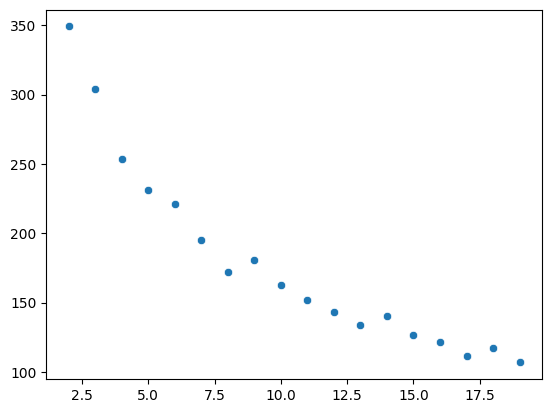

In [111]:
# elbow 

clusters_range = list(range(2, 20))
inertia = []

for i in list(range(2, 20)):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_result_vectors)
    inertia.append(kmeans.inertia_)

sns.scatterplot(x=clusters_range, y=inertia)

In [112]:
from sklearn.metrics import silhouette_score

k_range = range(2, 20)
best_n = -1
best_silhouette_score = -1

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 100)
    kmeans.fit(df_result_vectors)
    clusters = kmeans.predict(df_result_vectors)
    
    score = silhouette_score(df_result_vectors, clusters)
    print('k :', k, 'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score = score
        
print('best n :', best_n, 'best score :', best_silhouette_score)

k : 2 score : 0.3180352910171951
k : 3 score : 0.15579460265267606
k : 4 score : 0.1552319535695874
k : 5 score : 0.24374405349332168
k : 6 score : 0.19912226569164498
k : 7 score : 0.22056354546269996
k : 8 score : 0.19373620891652388
k : 9 score : 0.19847880569567486
k : 10 score : 0.20208553061813944
k : 11 score : 0.20996674447020458
k : 12 score : 0.24169286872778034
k : 13 score : 0.23647400311401212
k : 14 score : 0.2569408349071995
k : 15 score : 0.2598514406453253
k : 16 score : 0.2597325974250195
k : 17 score : 0.262587287351219
k : 18 score : 0.27658548540317296
k : 19 score : 0.3034947006697321
best n : 2 best score : 0.3180352910171951


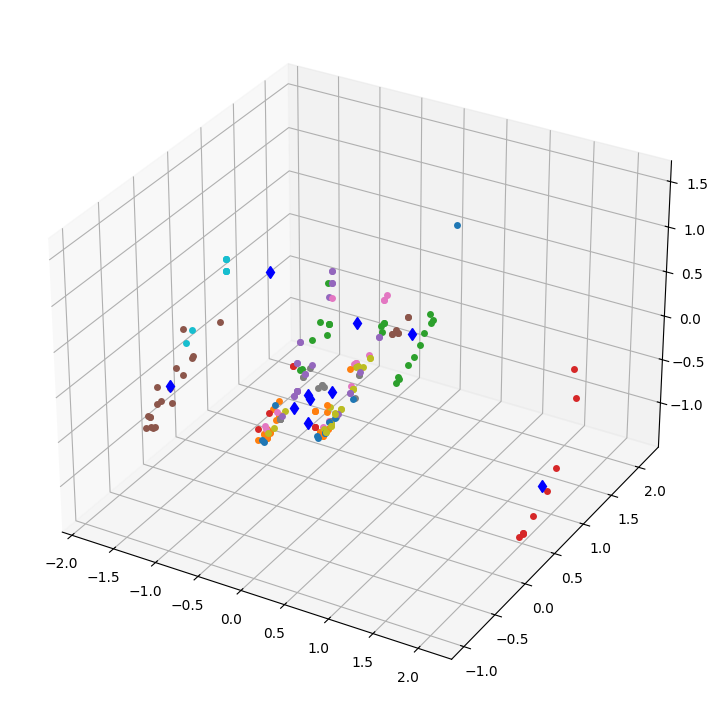

In [113]:
# PCA 차원 축소
%matplotlib inline
using_pca = PCA(n_components=3)
using_pca.fit(df_result_vectors)
pca= using_pca.transform(df_result_vectors)
centers_trans= using_pca.transform(centers)

xs, ys, zs = pca[:, 0], pca[:, 1], pca[:, 2]

df_plot = pd.DataFrame(dict(x=xs, y=ys, z=zs, label=clusters))
groups = df_plot.groupby('label')


fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection = '3d')
ax.margins(0.05)
colors = {0:'r', 1: 'b', 2: 'k', 3: 'm', 4: 'c', 5: 'g', 6: 'w'}
for idx, group in groups:
    ax.plot(group.x, group.y, group.z ,marker='o', linestyle='', ms=5, mec='none')
    ax.set_aspect('auto')
    ax.tick_params(        axis= 'x',
        which='both',
        bottom='off',
        top='off',
        labelbottom='off')
    ax.tick_params(        axis= 'y',
        which='both',
        left='off',
        top='off',
        labelleft='off')
    ax.tick_params(        axis= 'z',
        which='both',
        left='off',
        top='off',
        labelleft='off')



ax.plot(centers_trans[:,0],centers_trans[:,1],centers_trans[:,2], c='b', zorder=100, marker='d', linestyle='')
plt.show()

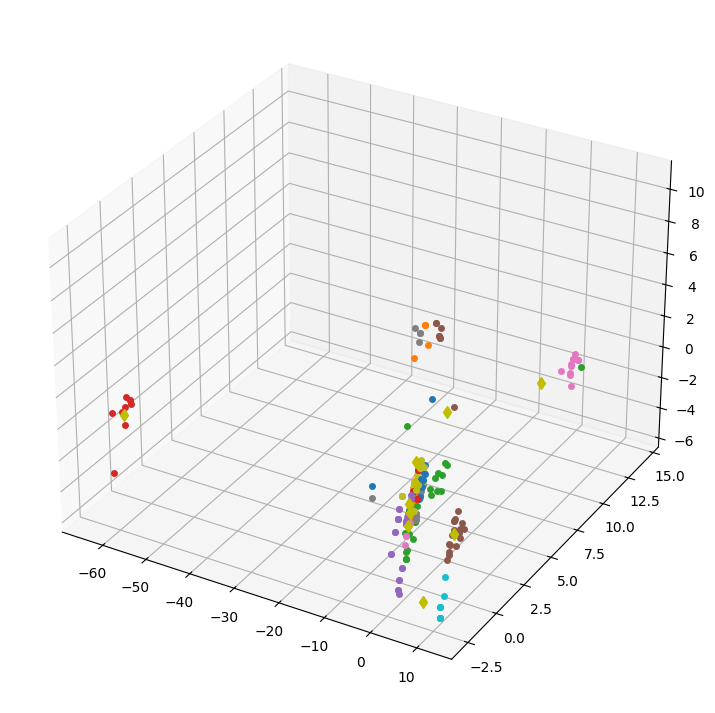

In [114]:
#LDA 차원축소
lda = LinearDiscriminantAnalysis(n_components=3)

#학습
lda.fit(df_result_vectors, clusters)
#변형
data_lda = lda.transform(df_result_vectors)
centers_trans= lda.transform(centers)

#DataFrame 생성
lda_columns=['lda_component_1','lda_component_2','lda_component_3']
DF_lda = pd.DataFrame(data_lda, columns=lda_columns)
DF_lda['target']=clusters


#축 지정
xs, ys, zs = data_lda[:, 0], data_lda[:, 1], data_lda[:, 2]

df_plot = pd.DataFrame(dict(x=xs, y=ys, z=zs, label=clusters))
groups = df_plot.groupby('label')

markers=['^', 's', 'o','d','*']
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection = '3d')
ax.margins(0.05)
colors = {0:'r', 1: 'b', 2: 'k', 3: 'm', 4: 'c', 5: 'g', 6: 'w'}
for idx, group in groups:
    ax.plot(group.x, group.y, group.z ,marker='o', linestyle='', ms=5, mec='none' )
    ax.set_aspect('auto')
    ax.tick_params(        axis= 'x',
        which='both',
        bottom='off',
        top='off',
        labelbottom='off')
    ax.tick_params(        axis= 'y',
        which='both',
        left='off',
        top='off',
        labelleft='off')
    ax.tick_params(        axis= 'z',
        which='both',
        left='off',
        top='off',
        labelleft='off')



ax.plot(centers_trans[:,0],centers_trans[:,1],centers_trans[:,2], c='y', zorder=100, marker='d', linestyle='')
plt.show()



In [115]:
# 데이터 프레임 형태로 클러스터 결과 확인

df["cluster"]= clusters

df_groupby_cluster = df.groupby('cluster')
#result = dict(list((df_groupby_cluster['name'])))

groupby_list = df.groupby('cluster')['name'].apply(list)

for i in groupby_list:
    print(i)
    print('\n')

['키움증권']


['SK텔레콤', '고려아연', 'SKC', '코웨이', '현대제철', 'GS', '한솔케미칼', 'BGF리테일', '포스코인터내셔널', '한샘', '한화', '코오롱인더', '한화에어로스페이스', '효성', '롯데정밀화학', '현대엘리베이', 'LS ELECTRIC', '동원시스템즈', '두산', '금호타이어', '코스맥스', '영풍', 'KG동부제철', 'LIG넥스원', '쿠쿠홈시스', '한세실업', '넥센타이어']


['삼성물산', 'LG생활건강', '엔씨소프트', '삼성에스디에스', '한화솔루션', '현대글로비스', '미래에셋증권', '오리온', 'CJ대한통운', '에스원', '휠라홀딩스', '오뚜기', 'F&F;홀딩스']


['SK이노베이션', 'S-Oil', 'SK바이오팜', '강원랜드', '한진칼', '삼성중공업', '롯데관광개발', 'CJ CGV', 'GKL']


['한미약품', 'SK케미칼', '대웅', '대웅제약', '녹십자홀딩스', '종근당', '일양약품']


['NAVER', '삼성바이오로직스', '카카오', '카카오뱅크', '크래프톤', '하이브', 'SK아이이테크놀로지', '두산중공업', '포스코케미칼', '삼성엔지니어링', '일진머티리얼즈', '동서', '씨에스윈드', '현대로템', '한전기술', '대한전선', '후성', '지누스']


['한국전력', '현대중공업지주', '롯데지주', '효성첨단소재', '롯데쇼핑', '효성티앤씨', '현대백화점', '화승엔터프라이즈', '풍산', '삼양홀딩스', '현대홈쇼핑', '현대두산인프라코어']


['삼성전자', '기아', '현대모비스', 'LG전자', '한온시스템', 'LG이노텍', '한국항공우주', '만도', 'DB하이텍', '현대위아', '세방전지', 'SNT모티브', 'LX홀딩스', 'LX하우시스']


['CJ제일제당', '이마트', 'GS리테일', '한화시스템', 'CJ', '신세계', 'LS', '영원무역', '농심', '롯데칠성', '한섬', '오리온

In [116]:
# 데이터 프레임 형태로 클러스터 결과 확인

df["cluster"]= clusters

df_groupby_cluster = df.groupby('cluster')
#result = dict(list((df_groupby_cluster['name'])))

groupby_list = df.groupby('cluster')['labels_kse'].apply(list)

for i in groupby_list:
    print(i)
    print('\n')


['증권']


['통신업', '철강및금속', '화학', '서비스업', '철강및금속', '금융업', '화학', '유통업', '유통업', '유통업', '화학', '화학', '운수장비', '금융업', '화학', '기계', '전기,전자', '화학', '서비스업', '화학', '화학', '철강및금속', '철강및금속', '기계', '서비스업', '섬유,의복', '화학']


['유통업', '화학', '서비스업', '서비스업', '화학', '운수창고', '증권', '음식료품', '운수창고', '서비스업', '유통업', '음식료품', '섬유,의복']


['화학', '화학', '서비스업', '서비스업', '운수창고', '운수장비', '서비스업', '서비스업', '서비스업']


['의약품', '화학', '금융업', '의약품', '서비스업', '의약품', '의약품']


['서비스업', '의약품', '서비스업', '은행', '서비스업', '서비스업', '전기,전자', '기계', '비금속광물', '서비스업', '전기,전자', '유통업', '기계', '운수장비', '서비스업', '전기,전자', '화학', '제조업']


['전기가스업', '화학', '금융업', '화학', '유통업', '화학', '유통업', '제조업', '철강및금속', '금융업', '유통업', '기계']


['전기,전자', '운수장비', '운수장비', '전기,전자', '기계', '전기,전자', '운수장비', '운수장비', '전기,전자', '운수장비', '전기,전자', '운수장비', '금융업', '화학']


['음식료품', '유통업', '유통업', '전기,전자', '금융업', '유통업', '금융업', '유통업', '음식료품', '음식료품', '섬유,의복', '금융업', '유통업', nan, '음식료품', '금융업', '음식료품', '유통업']


['의약품', '의약품', '의약품', '금융업', '의약품', '의약품', '의약품', '의약품', '의약품']


['철강및금속', '건설업', '비금속광물', '

In [117]:
########################################################################

### 여기 밑에다 붙여논 거였네

In [118]:
weight_text = 4
weight_price = 5
weight_finance = 3
df_dist_new = df_dist_text*weight_text + df_dist_finance*weight_finance + df_dist_price*weight_price
df_dist_new

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,6.848515,13.998873,15.668688,3.590011,15.180529,6.771239,5.371854,3.181227,14.449163,...,10.461409,12.603409,2.132215,11.069917,12.217451,8.040201,9.575606,8.140831,12.07537,13.465455
1,6.848515,0.0,14.394932,15.471759,3.258504,14.70261,4.407401,12.22037,7.997412,13.834554,...,8.257955,11.711796,8.98073,7.439034,10.553377,11.630212,5.301925,11.143902,10.849147,12.397296
2,13.998873,14.394932,0.0,8.448173,13.39739,2.535207,10.734689,18.540129,11.336173,14.285193,...,14.093959,12.105692,15.704198,12.460696,16.446336,13.272718,15.672679,14.231798,17.587717,19.10975
3,15.668688,15.471759,8.448173,0.0,14.811574,8.529699,12.788283,20.209943,13.645397,8.561089,...,15.718379,12.816669,17.374013,13.567208,17.271767,13.615173,17.104654,14.863354,17.410725,12.765297
4,3.590011,3.258504,13.39739,14.811574,0.0,14.579046,3.181227,8.961866,6.771239,13.592049,...,9.446232,11.588232,5.722227,7.479906,11.167705,11.630212,8.560428,11.730843,11.060192,12.608341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,8.040201,11.630212,13.272718,13.615173,11.630212,13.272718,11.630212,8.040201,8.040201,13.615173,...,12.225088,12.225088,8.040201,11.630212,12.892859,0.0,12.225088,8.040201,12.225088,13.615173
196,9.575606,5.301925,15.672679,17.104654,8.560428,15.980357,9.709325,11.473485,10.724503,15.46745,...,2.95603,6.409872,7.443391,8.476528,8.684697,12.225088,0.0,9.606562,9.811653,14.457082
197,8.140831,11.143902,14.231798,14.863354,11.730843,12.671423,9.672512,10.03871,6.0825,19.275486,...,7.286867,6.256763,6.008616,5.565897,9.031022,8.040201,9.606562,0.0,15.210505,16.600591
198,12.07537,10.849147,17.587717,17.410725,11.060192,17.335444,12.483007,17.447224,13.498185,12.788337,...,10.690511,11.602499,14.207585,14.947743,13.279062,12.225088,9.811653,15.210505,0.0,4.645429


In [119]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters = 10, metric = 'precomputed', method = 'pam', init = 'k-medoids++', max_iter = 10000)

In [120]:
kmedoids.fit(df_dist_new)

KMedoids(init='k-medoids++', max_iter=10000, method='pam', metric='precomputed',
         n_clusters=10)

<Axes: >

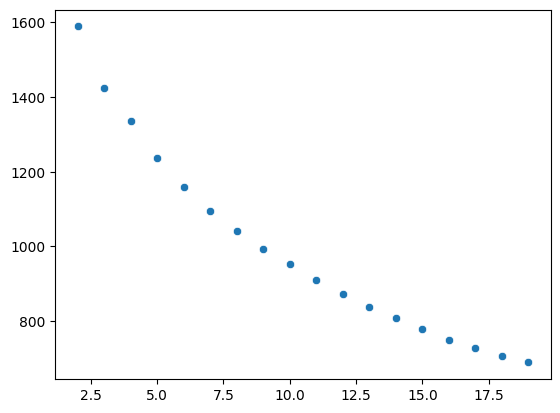

In [121]:
# elbow 

clusters_range = list(range(2, 20))
inertia = []

for i in list(range(2, 20)):
    kmeans = KMedoids(n_clusters = i, metric = 'precomputed', method = 'pam', init = 'k-medoids++', max_iter = 300)
    kmeans.fit(df_dist_new)
    inertia.append(kmeans.inertia_)

sns.scatterplot(x=clusters_range, y=inertia)

In [122]:
kmedoids_clusters = kmedoids.labels_
kmedoids_clusters

array([7, 9, 1, 4, 0, 1, 0, 7, 7, 4, 4, 6, 7, 3, 1, 5, 8, 2, 8, 3, 7, 9,
       4, 9, 9, 9, 3, 8, 1, 0, 8, 1, 6, 0, 6, 5, 0, 8, 1, 8, 0, 0, 3, 3,
       1, 9, 9, 7, 5, 9, 0, 1, 8, 9, 5, 2, 2, 9, 6, 8, 9, 9, 6, 8, 6, 3,
       6, 6, 7, 2, 4, 3, 8, 6, 3, 2, 4, 0, 0, 6, 5, 5, 3, 6, 3, 9, 2, 8,
       3, 9, 8, 2, 0, 0, 8, 4, 7, 6, 8, 4, 7, 2, 0, 3, 7, 9, 4, 2, 3, 1,
       0, 6, 2, 1, 7, 6, 2, 6, 8, 0, 6, 3, 2, 0, 7, 0, 8, 7, 0, 4, 0, 2,
       2, 2, 0, 6, 9, 4, 0, 0, 8, 2, 3, 6, 0, 8, 9, 4, 2, 7, 9, 2, 2, 5,
       9, 9, 4, 4, 9, 6, 2, 8, 1, 1, 1, 7, 5, 8, 0, 2, 4, 1, 2, 9, 6, 2,
       5, 0, 2, 9, 2, 4, 2, 2, 9, 2, 4, 9, 2, 2, 2, 2, 7, 9, 9, 7, 2, 7,
       8, 4], dtype=int64)

In [123]:
kmedoids_med = kmedoids.medoid_indices_
kmedoids_med

array([ 50, 109, 132,  19,   9, 166,  58,   8, 140,  53])

In [124]:
# 데이터 프레임 형태로 클러스터 결과 확인
df_merge_result["merge_clusters"]= kmedoids_clusters

df_groupby_cluster = df_merge_result.groupby('merge_clusters')
#result = dict(list((df_groupby_cluster['name'])))

groupby_list = df_merge_result.groupby('merge_clusters')['name'].apply(list)

for i in groupby_list:
    print(i)
    print('\n')

['LG화학', '삼성SDI', 'SK아이이테크놀로지', '삼성전기', '포스코케미칼', '고려아연', '대한항공', 'SKC', '한솔케미칼', '쌍용C&E;', 'OCI', '효성첨단소재', 'BGF리테일', '포스코인터내셔널', '한화', '코오롱인더', '한화에어로스페이스', '효성', '롯데정밀화학', '대한전선', '후성', 'LS ELECTRIC', '동원시스템즈', 'KG동부제철', 'LIG넥스원']


['NAVER', '카카오', '크래프톤', '하이브', 'HMM', '넷마블', 'KT', 'LG유플러스', '제일기획', '효성티앤씨', '더블유게임즈', '이노션', '태광산업', '화승엔터프라이즈']


['SK텔레콤', '코웨이', 'CJ제일제당', '이마트', '한국가스공사', 'GS리테일', '팬오션', '한화생명', 'CJ', '한샘', '현대미포조선', '신세계', 'LS', '영원무역', '현대엘리베이', '농심', '동국제강', '코스맥스', '롯데칠성', 'SK네트웍스', 'LX인터내셔널', '한섬', '오리온홀딩스', '쿠쿠홈시스', '한세실업', '풍산', '현대그린푸드', '삼양홀딩스', '동원산업', '대상', '쿠쿠홀딩스', '동원F&B;', '롯데하이마트']


['KB금융', '신한지주', '하나금융지주', '우리금융지주', '기업은행', '한국금융지주', '삼성증권', '삼성카드', 'NH투자증권', '호텔신라', '메리츠증권', 'BNK금융지주', '키움증권', '대우조선해양', '아시아나항공']


['삼성바이오로직스', '셀트리온', '카카오뱅크', 'SK바이오사이언스', '유한양행', '한미사이언스', '녹십자', '신풍제약', '씨에스윈드', 'SK케미칼', '대웅', '대웅제약', '녹십자홀딩스', '종근당', '한올바이오파마', '부광약품', '영진약품', '일양약품']


['SK이노베이션', 'S-Oil', 'SK바이오팜', '강원랜드', '한진칼', '삼성중공업', '롯데관광개발', 'CJ C

In [125]:
# 데이터 프레임 형태로 클러스터 결과 확인
df_join = pd.merge(df, df_merge_result[['name', 'merge_clusters']], left_on='name', right_on='name', how='inner')

df_groupby_cluster = df_join.groupby('merge_clusters')
#result = dict(list((df_groupby_cluster['name'])))

groupby_list = df_join.groupby('merge_clusters')['labels_kse'].apply(list)

for i in groupby_list:
    print(i)
    print('\n')

['화학', '전기,전자', '전기,전자', '전기,전자', '비금속광물', '철강및금속', '운수창고', '화학', '화학', '비금속광물', '화학', '화학', '유통업', '유통업', '화학', '화학', '운수장비', '금융업', '화학', '전기,전자', '화학', '전기,전자', '화학', '철강및금속', '기계']


['서비스업', '서비스업', '서비스업', '서비스업', '운수창고', '서비스업', '통신업', '통신업', '서비스업', '화학', '서비스업', '서비스업', '화학', '제조업']


['통신업', '서비스업', '음식료품', '유통업', '전기가스업', '유통업', '운수창고', '보험', '금융업', '유통업', '운수장비', '유통업', '금융업', '유통업', '기계', '음식료품', '철강및금속', '화학', '음식료품', '유통업', '유통업', '섬유,의복', '금융업', '서비스업', '섬유,의복', '철강및금속', '유통업', '금융업', nan, '음식료품', '금융업', '음식료품', '유통업']


['금융업', '금융업', '금융업', '금융업', '은행', '금융업', '증권', '금융업', '증권', '유통업', '증권', '금융업', '증권', '운수장비', '운수창고']


['의약품', '의약품', '은행', '의약품', '의약품', '금융업', '의약품', '의약품', '기계', '화학', '금융업', '의약품', '서비스업', '의약품', '의약품', '의약품', '의약품', '의약품']


['화학', '화학', '서비스업', '서비스업', '운수창고', '운수장비', '서비스업', '서비스업', '서비스업']


['철강및금속', '기계', '보험', '건설업', '서비스업', '화학', '전기,전자', '보험', '금융업', '기계', '건설업', '화학', '건설업', '건설업', '보험', '서비스업', '건설업', '건설업', '철강및금속', '화학']


['전기,전자', '

In [126]:
df_merge_result.loc[kmedoids_med]

,name,text_clusters,price_clusters,finance_clusters,merge_clusters
50,SKC,4,17,4,0
109,제일기획,0,19,4,1
132,영원무역,3,4,0,2
19,신한지주,1,19,2,3
9,셀트리온,5,3,1,4
166,CJ CGV,3,17,3,5
58,현대건설,6,19,0,6
8,기아,2,9,4,7
140,오뚜기,3,1,4,8
53,LG디스플레이,4,2,0,9
